<a href="https://colab.research.google.com/github/nicoataiza/CS7318/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip3 install --upgrade pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
col_names = ['Target','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age']
df = pd.read_csv(r'/content/drive/MyDrive/Uni of Adelaide/CS7318/Assignment 1/indian_diabetes_scaled.csv',header=None,names=col_names,index_col=False)

In [5]:
df.columns

Index(['Target', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')

In [6]:
for col in df.columns[1:]:
  df[col] = df[col].apply(lambda x: float(x[2:]) if type(x) == str else float('NaN'))

In [7]:
# Change the values: replace the value of no diabetes to 0 instead of -1.
df['Target'] = df['Target'].replace(-1,0)

In [8]:
df.head()

,Target,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [9]:
df.dtypes

Target                int64
Pregnancies         float64
Glucose             float64
BloodPressure       float64
SkinThickness       float64
Insulin             float64
BMI                 float64
DiabetesPedigree    float64
Age                 float64
dtype: object

In [10]:
df.shape

(768, 9)

In [11]:
df.Target.value_counts()

1    500
0    268
Name: Target, dtype: int64

[Text(0, 0, '268'), Text(0, 0, '500')]

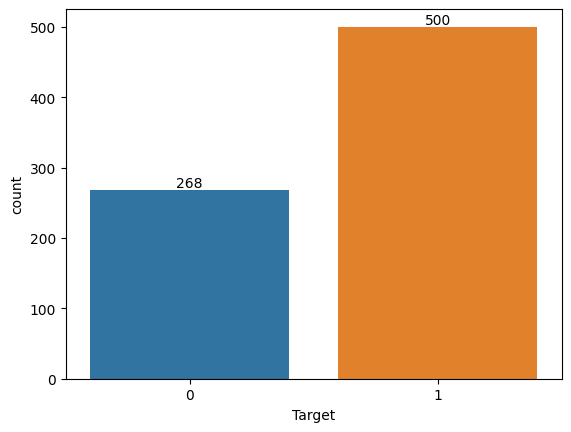

In [12]:
ax = sns.countplot(x=df.Target)

# Taken from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
abs_values = df.Target.value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Based on how the data is codified, Target = 1 pertains to having no diabetes, and Target = 0 pertains to having diabetes.

# Check for missing Data

In [13]:
df.isna().sum()

Target              0
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 9
dtype: int64

We have missing data. 9 instances of the feature Age is missing. Given that, the missing data only comprises 1.17% of our dataset. We will drop the rows with missing data.

# Dropping the rows with missing data

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(759, 9)

[Text(0, 0, '263'), Text(0, 0, '496')]

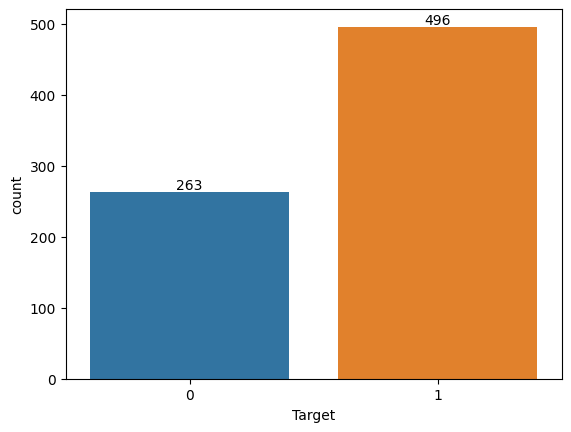

In [16]:
ax = sns.countplot(x=df.Target)

# Taken from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
abs_values = df.Target.value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Of the missing data, 5 belong to class 0 and 4 belong to class 1.

# Inspecting the Data

<Axes: >

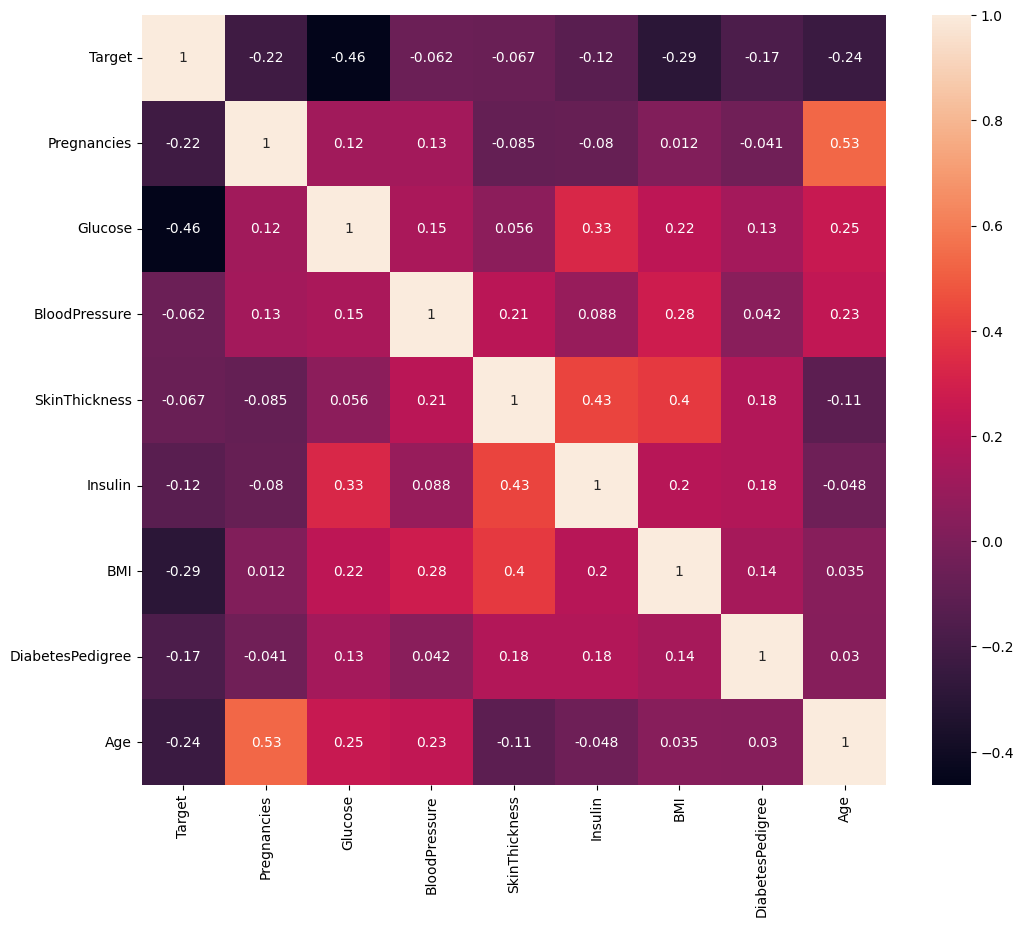

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [45]:
df.describe()

,Target,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,0.653491,-0.553902,0.211976,0.130392,-0.584860,-0.812335,-0.046738,-0.664571,-0.599166
std,0.476171,0.393479,0.321448,0.317587,0.322290,0.273006,0.235680,0.282291,0.388652
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858668,-0.900000
50%,1.000000,-0.647059,0.165829,0.180328,-0.535354,-0.940898,-0.046200,-0.749787,-0.733333
75%,1.000000,-0.294118,0.407035,0.311475,-0.353535,-0.703310,0.087929,-0.532878,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# df = df[['Target','Age','BMI','Glucose','Pregnancies']]

# Splitting Dataset

I opted to use KFold here since the dataset only has 759 instances. We will do a train-test split with a proportion of of 80-20. Additionally, we will stratify the target for the model to learn about both classes since one is underrepresented.

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

In [20]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0,train_size = 0.80)

# Using Linear Classifiers to predict diabetes

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [23]:
def evaluate_model(clf,
                   X_train,
                   y_train,
                   X_test,
                   y_test):
  clf.fit(X_train,y_train)
  print('Training data metrics')
  print('---------------------')
  y_train_pred = clf.predict(X_train)
  print('accuracy:', accuracy_score(y_train,y_train_pred))
  print('precision:', precision_score(y_train,y_train_pred))
  print('recall:', recall_score(y_train,y_train_pred))
  print('f1:', f1_score(y_train,y_train_pred))
  print()
  y_pred = clf.predict(X_test)

  print('Test data metrics')
  print('---------------------')
  print('accuracy:', accuracy_score(y_test,y_pred))
  print('precision:', precision_score(y_test,y_pred))
  print('recall:', recall_score(y_test,y_pred))
  print('f1:', f1_score(y_test,y_pred))

## Logistic Regression

For Logistic Regression, the scikit-learn library has a function specifically for Logistic Regression using cross-validation

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
evaluate_model(LogisticRegression(random_state=0), X_train,y_train,X_test,y_test)

Training data metrics
---------------------
accuracy: 0.7792421746293245
precision: 0.7981859410430839
recall: 0.8866498740554156
f1: 0.8400954653937949

Test data metrics
---------------------
accuracy: 0.7697368421052632
precision: 0.7666666666666667
recall: 0.9292929292929293
f1: 0.8401826484018264


## Support Vector Machines

In [26]:
from sklearn.svm import SVC

In [27]:
evaluate_model(SVC(random_state=0),X_train,y_train,X_test,y_test)

Training data metrics
---------------------
accuracy: 0.8056013179571664
precision: 0.8093126385809313
recall: 0.9193954659949622
f1: 0.8608490566037738

Test data metrics
---------------------
accuracy: 0.7828947368421053
precision: 0.7946428571428571
recall: 0.898989898989899
f1: 0.8436018957345972


We see that SVMs slightly outperform Logistic Regression across multiple metrics except for Recall (or true positive rate). We can refer to this as our benchmark values to compare our neural networks to.

# Single Layer Perceptron

In [40]:
import torch
import numpy
import random

from torch.utils.data import DataLoader, TensorDataset

In [29]:
# Converting dataFrames into tensors
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_t = torch.from_numpy(X_train)
X_test_t = torch.from_numpy(X_test)
y_train_t = torch.from_numpy(y_train)
y_test_t = torch.from_numpy(y_test)

train_data_tensor = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_data_tensor, batch_size=32, shuffle=True, worker_init_fn=np.random.seed(0))

In [30]:
# https://medium.com/@shashankshankar10/introduction-to-neural-networks-build-a-single-layer-perceptron-in-pytorch-c22d9b412ccf
class SingleLayerNet(torch.nn.Module):
    def __init__(self, input_size):
        super(SingleLayerNet, self).__init__()
        self.input_layer = torch.nn.Linear(input_size, 1)

    #Define how forward-pass
    def forward(self, x):
        y_pred = torch.tanh(self.input_layer(x))
        return y_pred

In [31]:
# create the model
# 8 is the number of weights in the neural net
model = SingleLayerNet(df.shape[1]-1)

In [32]:
# Define the loss function (criterion)
criterion = torch.nn.BCEWithLogitsLoss()

# Create an optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

In [33]:
# Define the training loop
epochs = 500
losses = []
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch [{epoch+1}], Loss: {loss.item()}')

Epoch [1], Loss: 0.6646811366081238
Epoch [2], Loss: 0.6590998768806458
Epoch [3], Loss: 0.6732540726661682
Epoch [4], Loss: 0.6653270721435547
Epoch [5], Loss: 0.6549549698829651
Epoch [6], Loss: 0.6066134572029114
Epoch [7], Loss: 0.6494652628898621
Epoch [8], Loss: 0.6550242304801941
Epoch [9], Loss: 0.6422959566116333
Epoch [10], Loss: 0.6311971545219421
Epoch [11], Loss: 0.615738570690155
Epoch [12], Loss: 0.6428537964820862
Epoch [13], Loss: 0.6612270474433899
Epoch [14], Loss: 0.6382863521575928
Epoch [15], Loss: 0.6130692958831787
Epoch [16], Loss: 0.6423464417457581
Epoch [17], Loss: 0.5954228639602661
Epoch [18], Loss: 0.643485426902771
Epoch [19], Loss: 0.5979796051979065
Epoch [20], Loss: 0.6893201470375061
Epoch [21], Loss: 0.6021414399147034
Epoch [22], Loss: 0.6118590235710144
Epoch [23], Loss: 0.6063625812530518
Epoch [24], Loss: 0.6150782108306885
Epoch [25], Loss: 0.6223065257072449
Epoch [26], Loss: 0.549714207649231
Epoch [27], Loss: 0.5974647998809814
Epoch [28], L

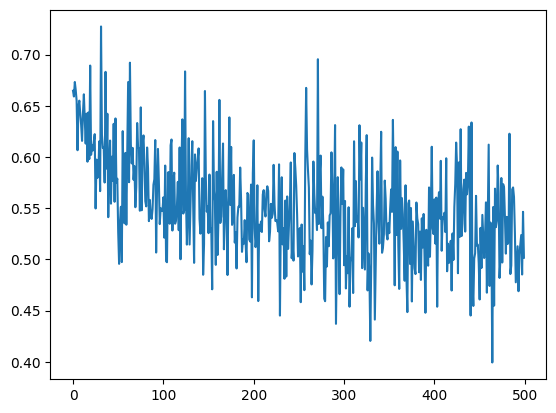

In [34]:
plt.plot(np.arange(0,500),losses)

In [35]:
model.eval()
with torch.no_grad():
    y_pred = model(X_train_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_train_t.view(-1, 1)).float().mean()
    print(f'Accuracy on train set: {accuracy.item()}')
print()
print('TRAIN DATA')
print('---------------------')
print('accuracy:', accuracy_score(y_train,y_pred))
print('precision:', precision_score(y_train,y_pred))
print('recall:', recall_score(y_train,y_pred))
print('f1:', f1_score(y_train,y_pred))

Accuracy on train set: 0.7611202597618103

TRAIN DATA
---------------------
accuracy: 0.7611202635914333
precision: 0.8405405405405405
recall: 0.783375314861461
f1: 0.8109517601043024


In [36]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_test_t.view(-1, 1)).float().mean()
    print(f'Accuracy on test set: {accuracy.item()}')
print()
print('TEST')
print('---------------------')
print('accuracy:', accuracy_score(y_test,y_pred))
print('precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1:', f1_score(y_test,y_pred))

Accuracy on test set: 0.7697368264198303

TEST
---------------------
accuracy: 0.7697368421052632
precision: 0.826530612244898
recall: 0.8181818181818182
f1: 0.8223350253807107


Model fails to converge which indicates that there might be optimizations that can be made.

## SLP with Xavier Initialization

Epoch [1], Loss: 0.6550556421279907
Epoch [2], Loss: 0.6500835418701172
Epoch [3], Loss: 0.6778270602226257
Epoch [4], Loss: 0.6476876735687256
Epoch [5], Loss: 0.6618343591690063
Epoch [6], Loss: 0.6364650130271912
Epoch [7], Loss: 0.6390873193740845
Epoch [8], Loss: 0.7174266576766968
Epoch [9], Loss: 0.6380695700645447
Epoch [10], Loss: 0.6087691783905029
Epoch [11], Loss: 0.6901652216911316
Epoch [12], Loss: 0.5798736214637756
Epoch [13], Loss: 0.5782963633537292
Epoch [14], Loss: 0.6250697374343872
Epoch [15], Loss: 0.5938732028007507
Epoch [16], Loss: 0.6478983759880066
Epoch [17], Loss: 0.5964667797088623
Epoch [18], Loss: 0.619221568107605
Epoch [19], Loss: 0.6109639406204224
Epoch [20], Loss: 0.6560348272323608
Epoch [21], Loss: 0.5856719017028809
Epoch [22], Loss: 0.6032587289810181
Epoch [23], Loss: 0.5879141092300415
Epoch [24], Loss: 0.6905999779701233
Epoch [25], Loss: 0.5287784337997437
Epoch [26], Loss: 0.6153689026832581
Epoch [27], Loss: 0.6119183301925659
Epoch [28],

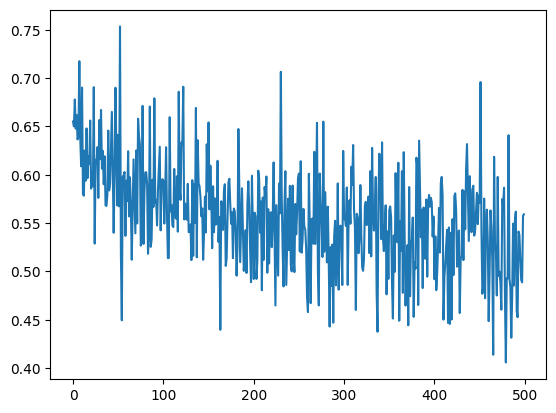

In [37]:
# https://stackoverflow.com/questions/49433936/how-do-i-initialize-weights-in-pytorch
class SingleLayerNet(torch.nn.Module):
    def __init__(self, input_size):
        super(SingleLayerNet, self).__init__()
        self.input_layer = torch.nn.Linear(input_size, 1)
        torch.nn.init.xavier_uniform_(self.input_layer.weight,gain=1)

    #Define how forward-pass
    def forward(self, x):
        y_pred = torch.tanh(self.input_layer(x))
        return y_pred

# create the model
# 8 is the number of weights in the neural net
model = SingleLayerNet(df.shape[1]-1)

# Define the loss function (criterion)
criterion = torch.nn.BCEWithLogitsLoss()

# Create an optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

# Define the training loop
epochs = 500
losses = []
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch [{epoch+1}], Loss: {loss.item()}')

plt.plot(np.arange(0,epochs),losses)

In [38]:
model.eval()
with torch.no_grad():
    y_pred = model(X_train_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_train_t.view(-1, 1)).float().mean()
    print(f'Accuracy on train set: {accuracy.item()}')
print()
print('TRAIN DATA')
print('---------------------')
print('accuracy:', accuracy_score(y_train,y_pred))
print('precision:', precision_score(y_train,y_pred))
print('recall:', recall_score(y_train,y_pred))
print('f1:', f1_score(y_train,y_pred))

Accuracy on train set: 0.7611202597618103

TRAIN DATA
---------------------
accuracy: 0.7611202635914333
precision: 0.8405405405405405
recall: 0.783375314861461
f1: 0.8109517601043024


In [39]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_test_t.view(-1, 1)).float().mean()
    print(f'Accuracy on test set: {accuracy.item()}')
print()
print('TEST')
print('---------------------')
print('accuracy:', accuracy_score(y_test,y_pred))
print('precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1:', f1_score(y_test,y_pred))

Accuracy on test set: 0.7763158082962036

TEST
---------------------
accuracy: 0.7763157894736842
precision: 0.8282828282828283
recall: 0.8282828282828283
f1: 0.8282828282828283


Our single layer perceptron has a test accuracy of 77.63%



## Confusion Matrix to Evaluate Model

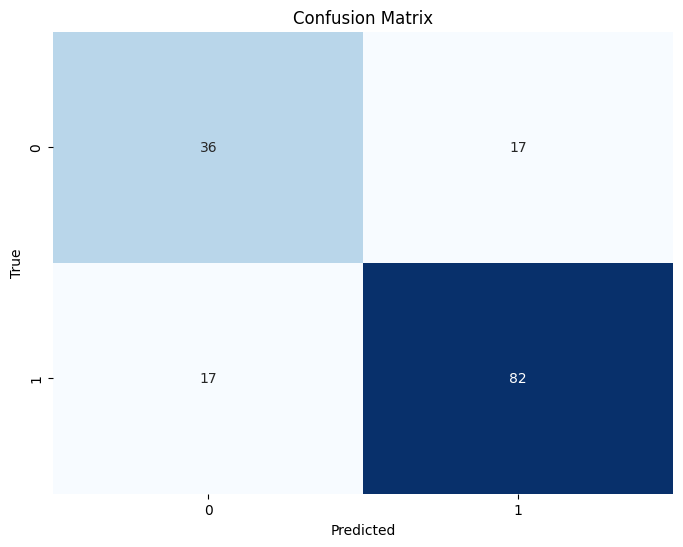

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()